In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate, build_logistic_classifier, plot_betas
import pandas as pd

ms = load_from_json(deepcopy(math_spec_json))



## Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.

Method: MC runs (across realizations of other stochastic variables), generating time series for e.g. miner decisions and proposed block rewards. 

Placeholder has no control action options


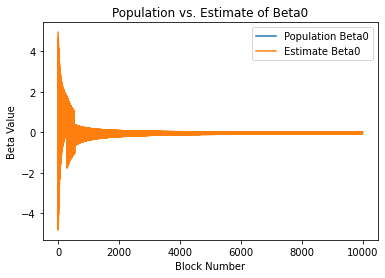

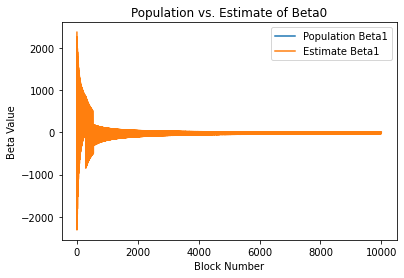

In [2]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])


for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, .001])


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])

df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [3]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.950778,2366.764993,0.0,0.001,1
1,-4.825196,-2306.729194,0.0,0.001,2
2,-4.751263,-2271.385009,0.0,0.001,3
3,4.709780,2251.553449,0.0,0.001,4
4,4.648920,2222.458996,0.0,0.001,5
...,...,...,...,...,...
9995,0.000056,0.026669,0.0,0.001,9996
9996,0.000056,0.026891,0.0,0.001,9997
9997,-0.062070,-29.672977,0.0,0.001,9998
9998,0.000054,0.025726,0.0,0.001,9999


## Sanity Check B

Above sanity check but with changing difficulties

Placeholder has no control action options


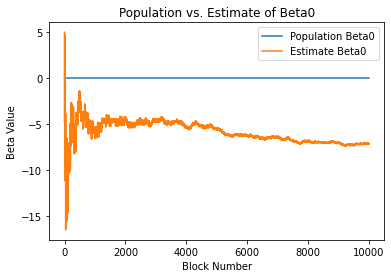

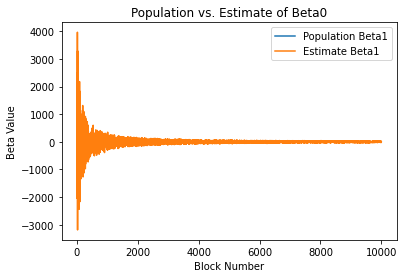

In [4]:
params_base["FP Mine Block Boundary Action"] = "TEST Mine Block Boundary Action"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [5]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,4.970755,2330.584718,0.0,0.001,1
1,-4.804770,-2041.424767,0.0,0.001,2
2,-4.739985,-2017.287530,0.0,0.001,3
3,-4.640922,-1961.903978,0.0,0.001,4
4,4.731394,2494.015066,0.0,0.001,5
...,...,...,...,...,...
9995,-7.208320,-22.171707,0.0,0.001,9996
9996,-7.208317,-22.170236,0.0,0.001,9997
9997,-7.208313,-22.168378,0.0,0.001,9998
9998,-7.146190,7.666007,0.0,0.001,9999


## Sanity Check C

Same difficulty but add in variations of difficulty in epochs

Placeholder has no control action options


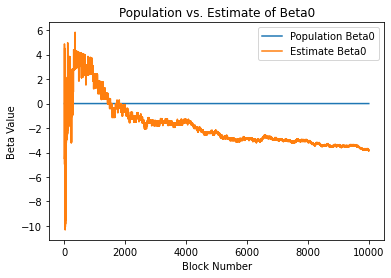

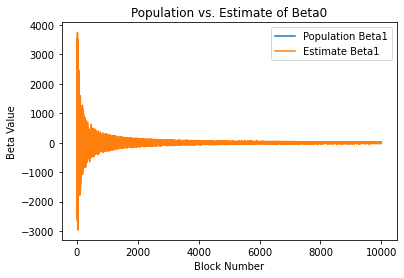

In [6]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = 6000


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [7]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.911135,-2622.526593,0.0,0.001,1
1,4.874234,2057.725991,0.0,0.001,2
2,-4.713636,-2454.081799,0.0,0.001,3
3,4.774644,2868.044430,0.0,0.001,4
4,-4.528168,-1080.215266,0.0,0.001,5
...,...,...,...,...,...
9995,-3.803768,2.548835,0.0,0.001,9996
9996,-3.803770,3.886029,0.0,0.001,9997
9997,-3.803773,10.774331,0.0,0.001,9998
9998,-3.803774,14.799477,0.0,0.001,9999


In [8]:
print(sum([x['Ratio'] for x in state["Historical Mined Ratio"]]) / len(state["Historical Mined Ratio"]))

0.3919467350190697


## Sanity Check D

Changing difficulty and V3 mining boundary action

Placeholder has no control action options


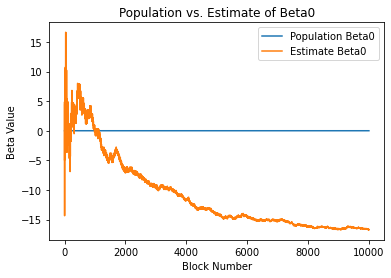

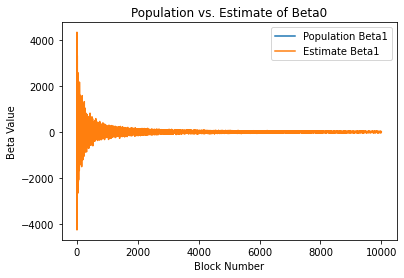

In [9]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])

for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(6000, 1000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)

In [10]:
df

,Estimate Beta0,Estimate Beta1,Population Beta0,Population Beta1,Block Number
0,-4.901575,-1776.717200,0.0,0.001,1
1,4.874119,4353.866039,0.0,0.001,2
2,-14.357362,-4270.813821,0.0,0.001,3
3,-4.788417,46.734629,0.0,0.001,4
4,-4.788854,-63.015695,0.0,0.001,5
...,...,...,...,...,...
9995,-16.752310,-7.765334,0.0,0.001,9996
9996,-16.690178,20.968900,0.0,0.001,9997
9997,-16.752305,-18.649413,0.0,0.001,9998
9998,-16.752301,-15.043853,0.0,0.001,9999


## Sanity Check E

Placeholder has no control action options


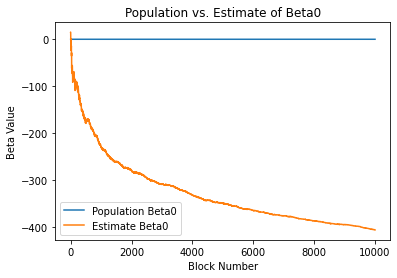

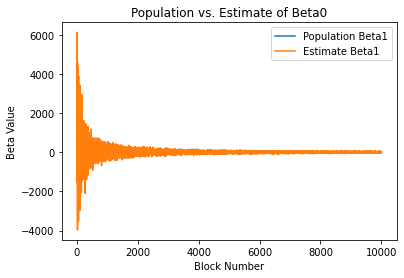

      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0          14.940630     4006.476677               0.0             0.001   
1          14.892953     6112.320249               0.0             0.001   
2          -4.402794      202.975583               0.0             0.001   
3         -13.881758      601.831608               0.0             0.001   
4         -23.184343      719.356744               0.0             0.001   
...              ...             ...               ...               ...   
9995     -405.248900       40.523566               0.0             0.001   
9996     -405.373171       -7.678014               0.0             0.001   
9997     -405.373172        5.639304               0.0             0.001   
9998     -405.373176       15.332504               0.0             0.001   
9999     -405.373177       19.237219               0.0             0.001   

      Block Number  
0                1  
1                2  
2                3  
3  

In [11]:
params_base["FP Mine Block Boundary Action"] = "Mine Block Boundary Action V3"
msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate,
                                                                                                   build_logistic_classifier], parameter_preperation_functions=[])
params["Difficulty Randomness Sigma"] = .25
for _ in range(10000):
    # Set fixed values
    state["K Qi"] = 1
    state["K Quai"] = 500
    state["Population Mining Beta Vector"] = np.array([0, 0.001])
    state["Block Difficulty"] = max(np.random.normal(8000, 2000), 100)


    msi.wiring["Mine Block Wiring"](state, params, [])
    msi.mechanisms["Log Simulation Data Mechanism"](state, params, [])
df = pd.DataFrame(state["Simulation History Log"])
plot_betas(df)
print(df)